# Tugas Akhir
# Chihago Crimes Dataset

##### Anggota Kelompok:
1. Aditya Arya Hendrady (1506722733)
2. Arfi Renaldi (1506722872)
3. Harry Akbar Ali Munir (1506689080)
4. Rifki Adrian (1506726946)

###### Kelas A
###### Faculty of Computer Science, University of Indonesia

## 1) Environment Preparation

### 1.a) Library installation

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

## 2) Data Preparation

In [61]:
df = pd.read_csv("Crimes_-_2001_to_present.csv")

print("Jumlah row: {}".format(df.shape[0]))
print("Jumlah feature: {}".format(df.shape[1]))
df.head()

Jumlah row: 6582553
Jumlah feature: 22


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


### 2.a) Data Cleansing

#### Sampling

Sampling diperlukan karena terdapat jumlah baris yang sangat banyak (6582553 baris) sehingga akan menyebabkan proses komputasi yang besar. Data sample diambil sebanyak 30% sebanyak data populasi

In [114]:
import numpy as np
import random

df_sample = df.sample(n=100000)
print("Jumlah row: {}".format(df_sample.shape[0]))
print("Jumlah feature: {}".format(df_sample.shape[1]))
df_sample

Jumlah row: 100000
Jumlah feature: 22


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
3503159,9489829,HX143573,12/01/2013 09:00:00 AM,019XX N NORMANDY AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,36.0,25.0,06,1131443.0,1912089.0,2013,02/10/2018 03:50:01 PM,41.915025,-87.792530,"(41.915024852, -87.792529579)"
2472607,7474621,HS276834,04/26/2010 01:00:00 PM,019XX W MORSE AVE,0810,THEFT,OVER $500,STREET,False,False,...,49.0,1.0,06,1161847.0,1946063.0,2010,02/10/2018 03:50:01 PM,42.007671,-87.679876,"(42.007670738, -87.679876395)"
4799328,3545924,HK624552,09/14/2004 05:00:00 PM,020XX W ST PAUL AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,32.0,24.0,07,1162556.0,1911590.0,2004,02/28/2018 03:56:25 PM,41.913060,-87.678237,"(41.913060315, -87.67823748)"
1666253,9585856,HX234581,04/22/2014 05:30:00 PM,063XX S ASHLAND AVE,0870,THEFT,POCKET-PICKING,CTA BUS STOP,False,False,...,16.0,67.0,06,1166755.0,1862773.0,2014,02/04/2016 06:33:39 AM,41.779013,-87.664209,"(41.779012821, -87.664208692)"
4626463,3266511,HK292611,04/09/2004 04:40:00 PM,064XX S EGGLESTON AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,20.0,68.0,14,1174385.0,1862249.0,2004,02/28/2018 03:56:25 PM,41.777409,-87.636252,"(41.777408581, -87.636252076)"
4461741,3021496,HJ726406,10/29/2003 06:59:42 PM,058XX S WABASH AVE,502R,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,STREET,True,False,...,20.0,40.0,26,1177715.0,1866243.0,2003,02/28/2018 03:56:25 PM,41.788294,-87.623924,"(41.788293802, -87.623923578)"
2968872,8396083,HT628562,12/12/2011 11:30:00 AM,034XX W JACKSON BLVD,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,...,28.0,27.0,18,1153573.0,1898480.0,2011,02/10/2018 03:50:01 PM,41.877269,-87.711588,"(41.877268743, -87.711588097)"
1261189,4479646,HL777767,12/08/2005 06:34:05 AM,047XX N KEDVALE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,39.0,14.0,08B,1147860.0,1931334.0,2005,02/10/2018 03:50:01 PM,41.967535,-87.731718,"(41.967534863, -87.731718488)"
3593792,9704205,HX354242,07/07/2014 05:30:00 PM,043XX N LINCOLN AVE,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,STREET,False,False,...,47.0,5.0,07,1161207.0,1928613.0,2014,02/10/2018 03:50:01 PM,41.959801,-87.682719,"(41.959800643, -87.682718777)"
5734173,5607498,HN416756,06/20/2007 03:35:00 AM,027XX S WELLS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,11.0,34.0,03,1175072.0,1886309.0,2007,02/28/2018 03:56:25 PM,41.843416,-87.633015,"(41.843416175, -87.633014778)"


#### Mengecek Null Values

In [115]:
df_sample.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description      49
Arrest                     0
Domestic                   0
Beat                       0
District                   2
Ward                    9422
Community Area          9441
FBI Code                   0
X Coordinate            1867
Y Coordinate            1867
Year                       0
Updated On                 0
Latitude                1867
Longitude               1867
Location                1867
dtype: int64

Dikarenakan adanya null values, sehingga kami perlu menghandle missing values.
Penanganan missing values ini dibagi menjadi 2 kategori yaitu pada data kategorikal dan data numerikal.
- Pada data numerikal, kami memutuskan untuk mengisi missing values dengan nilai median pada setiap fitur
- Pada data kategorikal, kami memutuskan untuk mengisi missing values dengan nilai modus pada setiap fitur

In [117]:
location_description_mode = df_sample["Location Description"].mode()
district_mean = df_sample["District"].mean()
ward_mean = df_sample["Ward"].mean()
community_area_mean = df_sample["Community Area"].mean()
x_coordinate_mean = df_sample["X Coordinate"].mean()
y_coordinate_mean = df_sample["Y Coordinate"].mean()
latitude_mean = df_sample["Latitude"].mean()
longitude_mean = df_sample["Longitude"].mean()

df_clean = df_sample.fillna(value={
    "Location Description": location_description_mode[0],
    "District" : district_mean,
    "Ward": ward_mean,
    "Community Area": community_area_mean,
    "X Coordinate": x_coordinate_mean,
    "Y Coordinate" : y_coordinate_mean,
    "Latitude" : latitude_mean,
    "Longitude" : longitude_mean,
    "Location" : "({},{})".format(latitude_mean, longitude_mean)
})

df_clean.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

####  Mengecek Outlier
Sebelum data digunakan lebih lanjut, kami perlu mengecek apakah ada outlier pada data.
Kami menggunakan box plot untuk melihat apakah ada outlier. Pada boxplot outlier ditandai dengan titik-titik hitam.

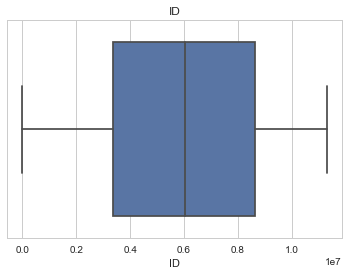

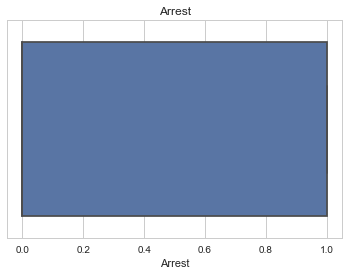

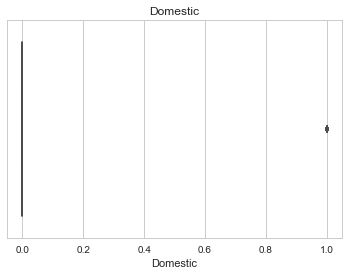

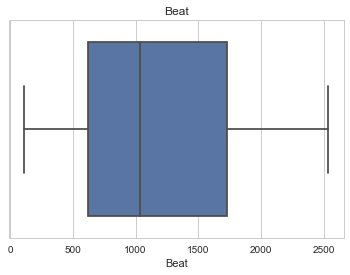

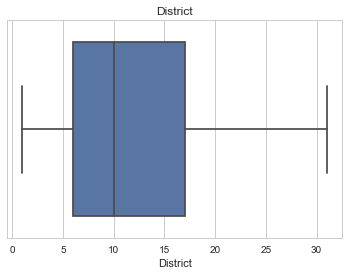

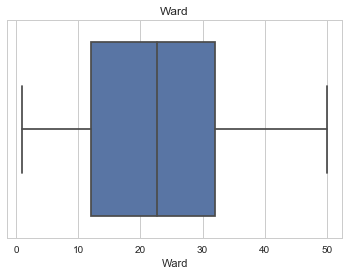

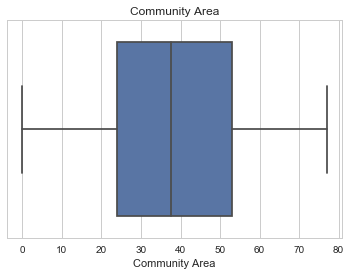

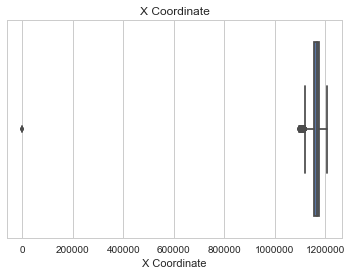

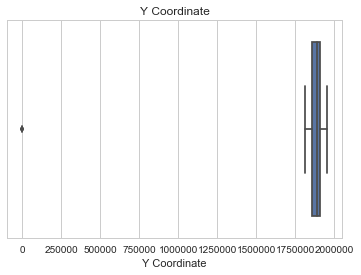

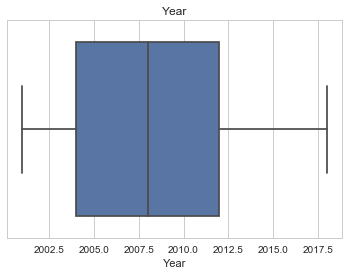

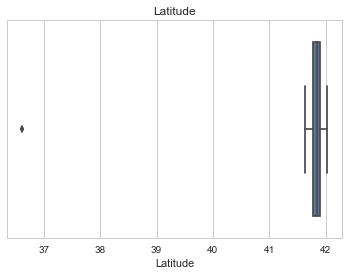

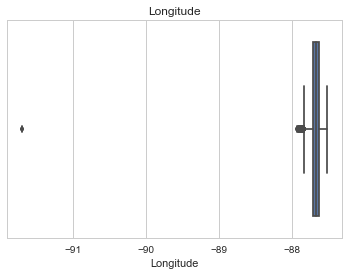

In [118]:
%matplotlib inline

def is_categorical(array_like):
    return array_like.dtype.name == 'object'

def box_plot(data, feature):
    if(not is_categorical(data)):
        sns.boxplot(data).set_title(feature)
        plt.show()

for i in df_clean:
    box_plot(df_clean[i], i)

Pada boxplot di atas terlihat bahwa ada beberapa feature yang memiliki outlier di dalamnya.
Diantaranya adalah:
- Domestic
- X Coordinate
- Y Coordinate
- Latitude
- Longitude

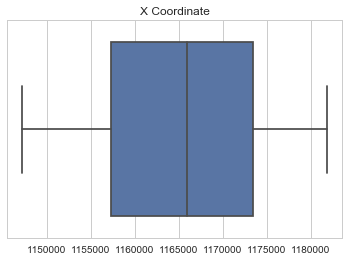

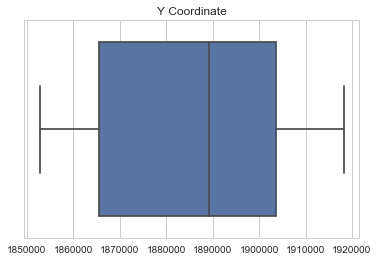

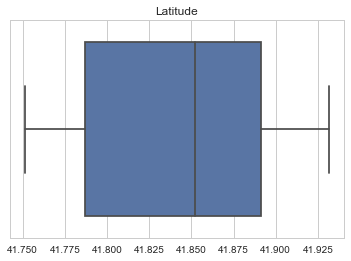

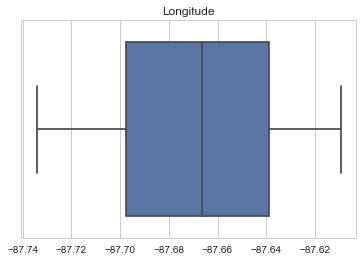

In [119]:
def remove_outlier(feature):
    arr = df_clean[feature]
    elements = np.array(arr)
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)
    final_list = [x for x in arr if (x > mean - 1 * sd)]
    final_list = [x for x in final_list if (x < mean + 1 * sd)]

    #visualisasi
    sns.boxplot(final_list).set_title(feature)
    plt.show()

features_with_outlier = ["X Coordinate", "Y Coordinate", "Latitude", "Longitude"]
for feature in features_with_outlier:
    remove_outlier(feature)

Nah, sekarang data tersebut sudah tidak memiliki outlier.

### 2.b) Feature Extraction

Pada tahap ini, akan dipilih fitur mana yang akan digunakan dengan melihat korelasi antar fitur dengan metode Spearman dan/atau Pearson

In [120]:
from sklearn.preprocessing import LabelEncoder

object_var = df_clean.select_dtypes(include=['object']).copy()
numeric_var = df_clean.select_dtypes(include=['int64','float64']).copy()
for col in object_var.columns:
    if(col != "Primary Type"):
        object_var = pd.get_dummies(object_var, columns=[col])

df_encoded = pd.concat([object_var, numeric_var],axis=1)
# labelencoder_y = LabelEncoder()
# y = labelencoder_y.fit_transform(data_sample_non_categorical["y"])
# data_sample_non_categorical["y"] = y
# default = labelencoder_y.fit_transform(data_sample_non_categorical["default"])
# data_sample_non_categorical["default"] = default
# housing = labelencoder_y.fit_transform(data_sample_non_categorical["housing"])
# data_sample_non_categorical["housing"] = housing
# loan = labelencoder_y.fit_transform(data_sample_non_categorical["loan"])
# data_sample_non_categorical["loan"] = loan
df_encoded

MemoryError: 

In [90]:
df_clean.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [ ]:
correlation = pd.DataFrame()
for col in df_clean:
    if col != 'price':
        pearson = automobile_final['price'].corr(automobile_final[col], method='pearson')
        correlation.loc["price-{}".format(col), "pearson"] = pearson
        spearman = automobile_final['price'].corr(automobile_final[col], method='spearman')
        correlation.loc["price-{}".format(col), "spearman"] = spearman
correlation.sort_values(by=['pearson'], ascending = False)

### 2.c) Data Analysis

## 3) Accuracy Testing

### 3.a) Test a few machine learning algorithm with your dataset